In [2]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


## EDA

In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
sample_submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
                       
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## EDA

In [4]:
train_data.columns.to_frame().T

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [5]:
train_data.isnull().mean().to_frame().T

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.0,0.0,0.0,0.177397,0.0,0.0,0.937671,0.0,0.0,0.0,...,0.0,0.995205,0.807534,0.963014,0.0,0.0,0.0,0.0,0.0,0.0


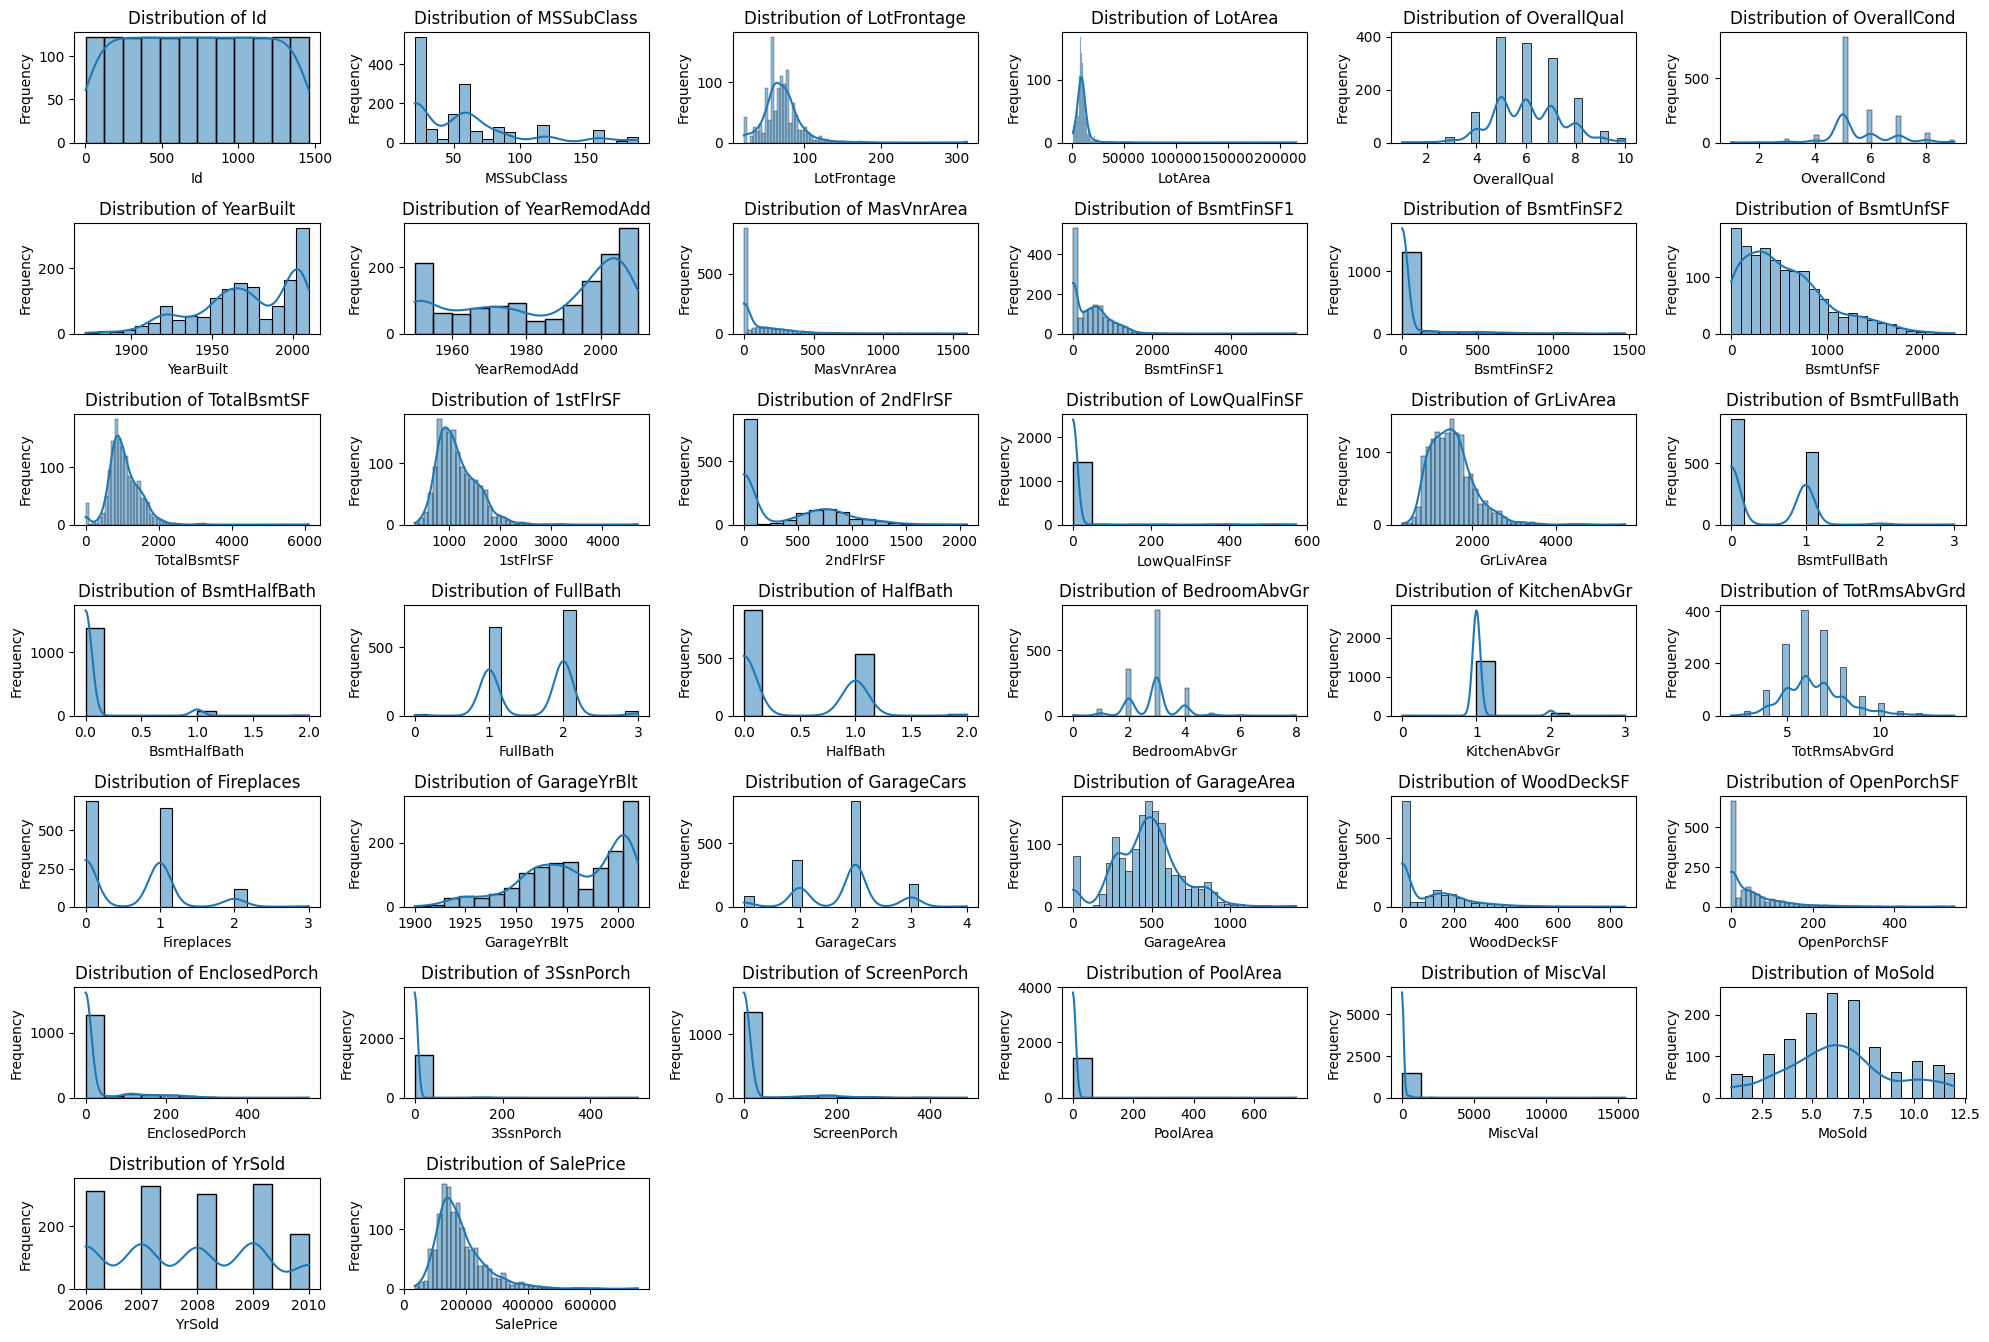

In [10]:
numeric_cols = train_data.select_dtypes(include=[np.number])
grid_size = (8, 6)  
fig, axes = plt.subplots(*grid_size, figsize=(20, 15))

for i, col_idx in enumerate(range(len(numeric_cols.columns))):  
    row, col = divmod(i, grid_size[1])
    ax = axes[row, col]
    sns.histplot(train_data[numeric_cols.columns[col_idx]], kde=True, ax=ax)  
    ax.set_title(f'Distribution of {numeric_cols.columns[col_idx]}')  
    ax.set_xlabel(numeric_cols.columns[col_idx])  
    ax.set_ylabel('Frequency')

for i in range(len(numeric_cols.columns), grid_size[0] * grid_size[1]):
    row, col = divmod(i, grid_size[1])
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


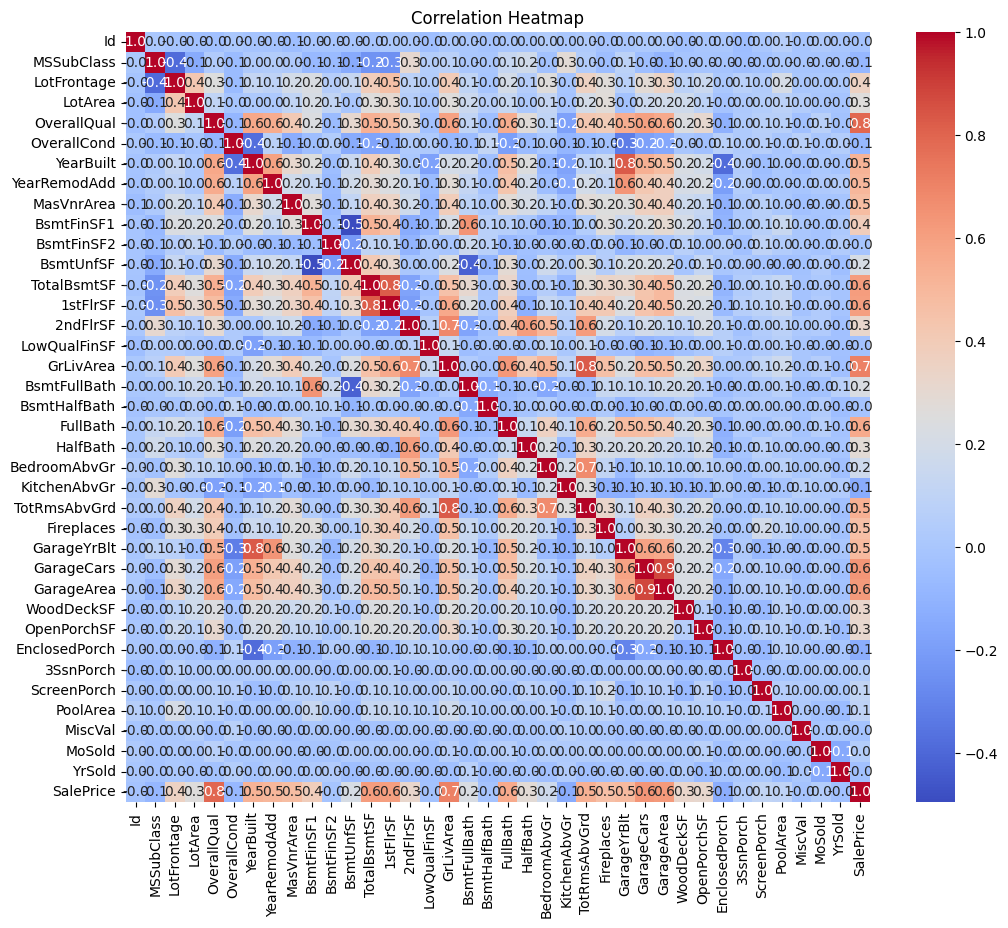

In [11]:
numeric_cols = train_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Correlation Heatmap")
plt.show()

# Pytorch NN

In [62]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [31]:
train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)

train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

X = train_data.drop(columns=['SalePrice'])
y = train_data['SalePrice']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)
print(type(X_train), type(y_train), type(X_val), type(y_val))


(1168, 304) (1168,) (292, 304) (292,)
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'> <class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


In [12]:
class BaseNN(nn.Module):
    def __init__(self, input_size):
        super(BaseNN, self).__init__()
        self.linear1 = nn.Linear(input_size, 32)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu1(x)
        x = self.linear2(x)
        return x

In [65]:
class NNetRegressor(BaseEstimator, RegressorMixin):
    def __init__(
        self,
        model, 
        loss=nn.MSELoss(), 
        optimizer_class=optim.Adam,
        optimizer_params={},
        epochs=100,
        batch_size=32, 
        learning_rate=0.001,
        device='cpu',
        metrics={'mse': mean_squared_error},
        val_set=None,
        verbose=False,
    ):
        self.model = model
        self.loss = loss
        self.optimizer_class = optimizer_class
        self.optimizer_params = optimizer_params
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.metrics = metrics
        self.val_set = val_set
        self.device = device
        self.verbose = verbose
        self.train_loss = []
        self.val_loss = []
        self.train_metrics = {k:[] for k,_ in metrics.items()}
        self.val_metrics = {k:[] for k,_ in metrics.items()}

    def fit(self, X, y):
        # init
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        y_tensor = torch.tensor(y, dtype=torch.float32).to(self.device)
        self.model.to(self.device)
        self.optimizer = self.optimizer_class(
            self.model.parameters(), 
            lr=self.learning_rate,
            **self.optimizer_params
        )
        
        # optimize
        self.model.train()
        for epoch in range(self.epochs):
            permutation = torch.randperm(X_tensor.size()[0])
            epoch_loss = 0.0
            for i in range(0, X_tensor.size()[0], self.batch_size):
                indices = permutation[i:i+self.batch_size]
                batch_X, batch_y = X_tensor[indices], y_tensor[indices]
                self.optimizer.zero_grad()
                preds = self.model(batch_X)
                loss = self.loss(preds, batch_y)
                loss.backward()
                self.optimizer.step()
            
            # train set loss and metrics
            y_train_preds = self.model(X_tensor).detach().cpu()
            self.train_loss.append(self.loss(y_train_preds, y_tensor).item())
            for name, metric in self.metrics.items():
                train_metric_value = metric(y, y_train_preds.numpy())
                self.train_metrics[name].append(train_metric_value)
            
            # val set loss and metrics
            if self.val_set:
                X_val, y_val = self.val_set
                X_val = torch.tensor(X_val, dtype=torch.float32)
                y_val = torch.tensor(y_val.values, dtype=torch.float32)
                self.model.eval()
                with torch.no_grad():
                    y_val_preds = self.model(X_val).detach().cpu()
                val_loss = self.loss(y_val_preds, y_val).item()
                self.val_loss.append(val_loss)
                
                for name, metric in self.metrics.items():
                    val_metric_value = metric(y_val.cpu().numpy(), y_val_preds.numpy())
                    self.val_metrics[name].append(val_metric_value)
            
            # verbose
            if self.verbose and epoch % 10 == 0:
                msg = f"Epoch {epoch + 1}/{self.epochs}"
                msg += f" - Loss: {self.train_loss[-1]:.4f}"
                msg += f" - Train metrics: {', '.join([f'{name}: {evals[-1]:.4f}' for name, evals in self.train_metrics.items()])}"
                if self.val_set:
                    msg += f" - Val Loss: {self.val_loss[-1]:.4f}"
                    msg += f" - Val Metrics: {', '.join([f'{name}: {evals[-1]:.4f}' for name, evals in self.val_metrics.items()])}"
                print(msg)
            
        return self

    def predict(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        self.model.eval()
        with torch.no_grad():
            predictions = self.model(X_tensor).cpu().numpy()
        return predictions
    
    def plot_loss(self):
        plt.figure(figsize=(10, 5))
        plt.plot(self.train_loss, label='Training Loss')
        if self.val_set:
            plt.plot(self.val_loss, label='Validation Loss')
        plt.title('Loss Over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def plot_metrics(self):
        for name, _ in self.metrics.items():
            plt.figure(figsize=(10, 5))
            plt.plot(self.train_metrics[name], label=f'Training {name.upper()}')
            if self.val_set:
                plt.plot(self.val_metrics[name], label=f'Validation {name.upper()}')
            plt.title(f'{name.upper()} Over Epochs')
            plt.xlabel('Epoch')
            plt.ylabel(name.upper())
            plt.legend()
            plt.show()


In [67]:
nnet = NNetRegressor(
    model=BaseNN(input_size=304),
    epochs=1000,
    val_set=(X_val, y_val),
    metrics={
        "mse": mean_squared_error,
        "mae": mean_absolute_error, 
        "mape" : mean_absolute_percentage_error
    },
    verbose=True,
)

nnet.fit(X_train, y_train)

Epoch 1/1000 - Loss: 38885195776.0000 - Train metrics: mse: 38885199801.1066, mae: 181440.4728, mape: 1.0000 - Val Loss: 39653654528.0000 - Val Metrics: mse: 39653646336.0000, mae: 178838.8281, mape: 1.0000
Epoch 11/1000 - Loss: 38825947136.0000 - Train metrics: mse: 38820625599.0727, mae: 181277.1064, mape: 0.9990 - Val Loss: 39596445696.0000 - Val Metrics: mse: 39588921344.0000, mae: 178678.8125, mape: 0.9990
Epoch 21/1000 - Loss: 38643421184.0000 - Train metrics: mse: 38620125669.7479, mae: 180772.6733, mape: 0.9959 - Val Loss: 39419686912.0000 - Val Metrics: mse: 39386976256.0000, mae: 178183.1875, mape: 0.9958
Epoch 31/1000 - Loss: 38359908352.0000 - Train metrics: mse: 38308538764.1483, mae: 179985.5804, mape: 0.9910 - Val Loss: 39144886272.0000 - Val Metrics: mse: 39072796672.0000, mae: 177409.2656, mape: 0.9909
Epoch 41/1000 - Loss: 37991354368.0000 - Train metrics: mse: 37902081126.1336, mae: 178955.8379, mape: 0.9846 - Val Loss: 38787809280.0000 - Val Metrics: mse: 3866296320

NNetRegressor(epochs=1000,
              metrics={'mae': <function mean_absolute_error at 0x7c1487d33eb0>,
                       'mape': <function mean_absolute_percentage_error at 0x7c1487d88040>,
                       'mse': <function mean_squared_error at 0x7c1487d880d0>},
              model=BaseNN(
  (linear1): Linear(in_features=304, out_features=32, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=32, out_features=1, bias=True)
),
              va...
       [ 0.17201878,  0.07337496,  0.15516119, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.18625482,  0.30985939,  0.06858717, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.01779505, -0.87256276,  0.35716722, ..., -0.11785113,
         0.4676514 , -0.30599503]]),
                       892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
479      89471
1361    260000
802     189000
651     108000
722     124500
Name: SalePrice, Length: 292, dtype: int64),
              verbose=True)

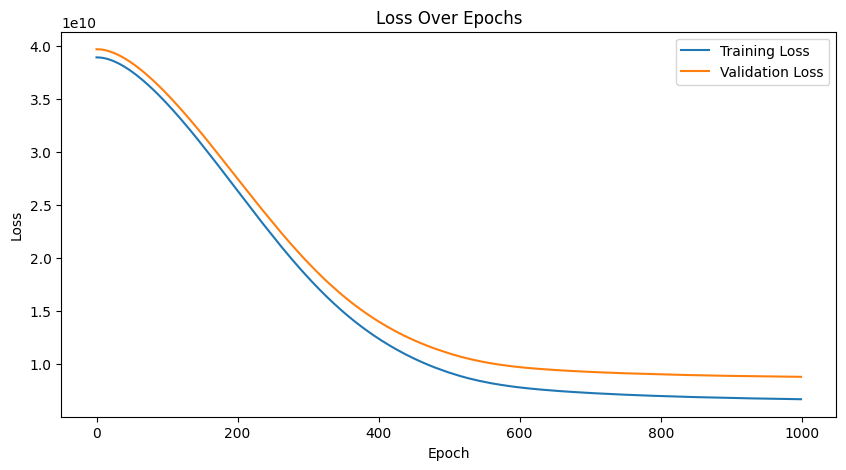

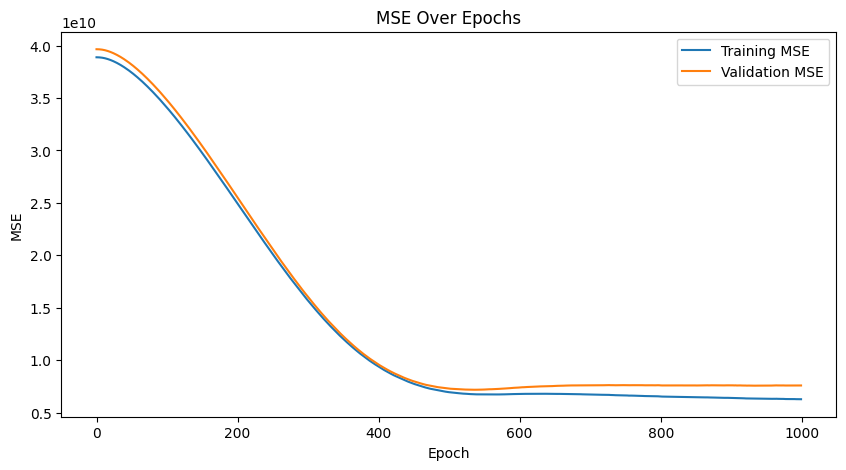

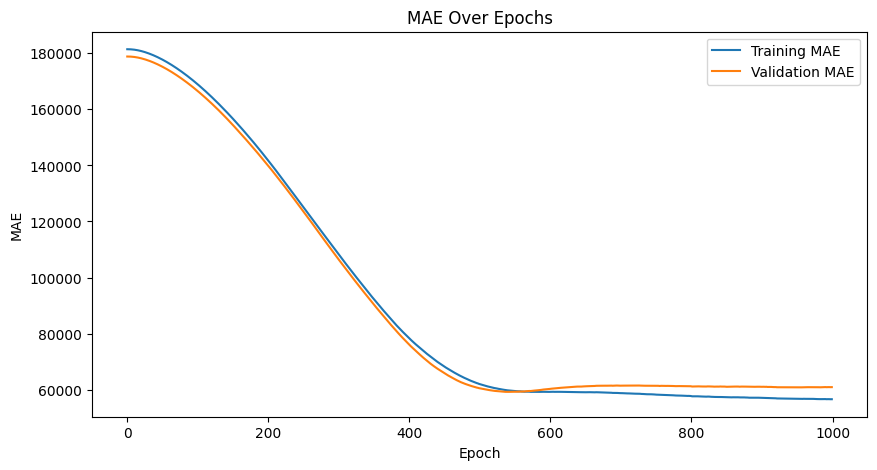

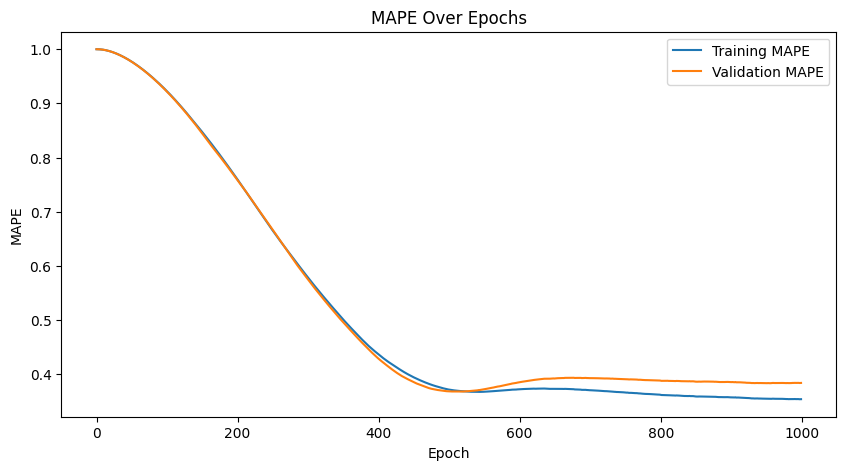

In [68]:
nnet.plot_loss()
nnet.plot_metrics()

In [ ]:
def train_and_evaluate(model, X_train, y_train, X_val, y_val, optimizer, criterion, num_epochs=100):
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    for epoch in range(num_epochs):
        inputs = torch.tensor(X_train, dtype=torch.float32).to(device)
        targets = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1).to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        val_inputs = torch.tensor(X_val, dtype=torch.float32).to(device)
        val_targets = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1).to(device)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_targets)
        train_acc = np.sqrt(((outputs - targets) ** 2).mean().item())
        val_acc = np.sqrt(((val_outputs - val_targets) ** 2).mean().item())
        train_losses.append(loss.item())
        val_losses.append(val_loss.item())
        train_accs.append(train_acc)
        val_accs.append(val_acc)

        print(f"Epoch [{epoch + 1}/{num_epochs}] Train Loss: {loss.item():.4f} Val Loss: {val_loss.item():.4f} Train Acc: {train_acc:.4f} Val Acc: {val_acc:.4f}")

    print("Training complete")
    

In [ ]:
train_and_evaluate(model, X_train, y_train, X_val, y_val, optimizer, criterion, num_epochs=100)


# 03 Prediction

In [ ]:
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_data

In [ ]:
test_data = pd.get_dummies(test_data)
test_data = pd.DataFrame(test_data, columns=train_data.columns)
test_data = test_data[train_data.columns.drop('SalePrice')]
test_data = scaler.transform(test_data)

test_data = torch.tensor(test_data, dtype=torch.float32).to(device) 

model.eval()
with torch.no_grad():
    predictions = model(test_data).squeeze().cpu().numpy() 